This project is pertain to Develop a machine learning model to predict employees trunover within the company that employees is going to leave or stay in the company.Through the machine learning model we have to find out the pattern employee's are leaving the company based on the data. we have to give at solution to HR Dept to make a improvemnt in certain areas in order to retain the employees.  

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.model_selection import train_test_split

%matplotlib inline 

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
import warnings
warnings.filterwarnings('ignore',category= FutureWarning)

In [7]:
# Reading data from 'hr_comma_sep.csv' file into a pandas datafrem
df_1=pd.read_csv('hr_comma_sep.csv')
df_1.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df_1.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


Checking Null Values


In [9]:
df_1.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [10]:
df_1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [11]:
[features for features in df_1.columns if df_1[features].isnull().sum()>0]


[]

In [12]:
df_1.shape

(14999, 10)

<Axes: >

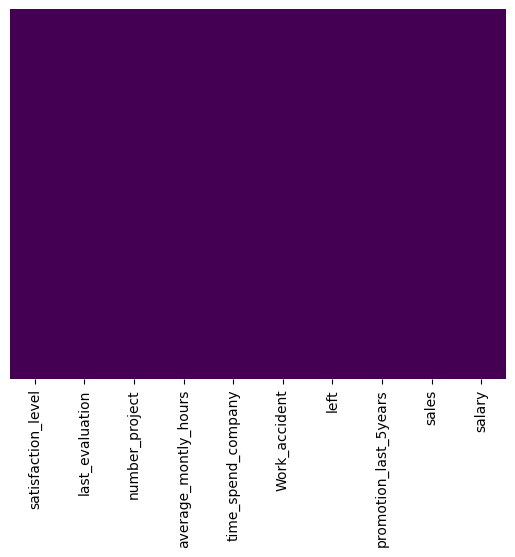

In [13]:
sns.heatmap(df_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Observation: As We Can see in the Heatmap There are no missinges values in the Data

Exploratory Data Analysis

In [14]:
# checking type of data contain by Datafram
df_1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [15]:
#Find out correlation between all numerical features or columns
Data_to_corr=df_1.drop(['sales','salary'],axis=1)
Data_to_corr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

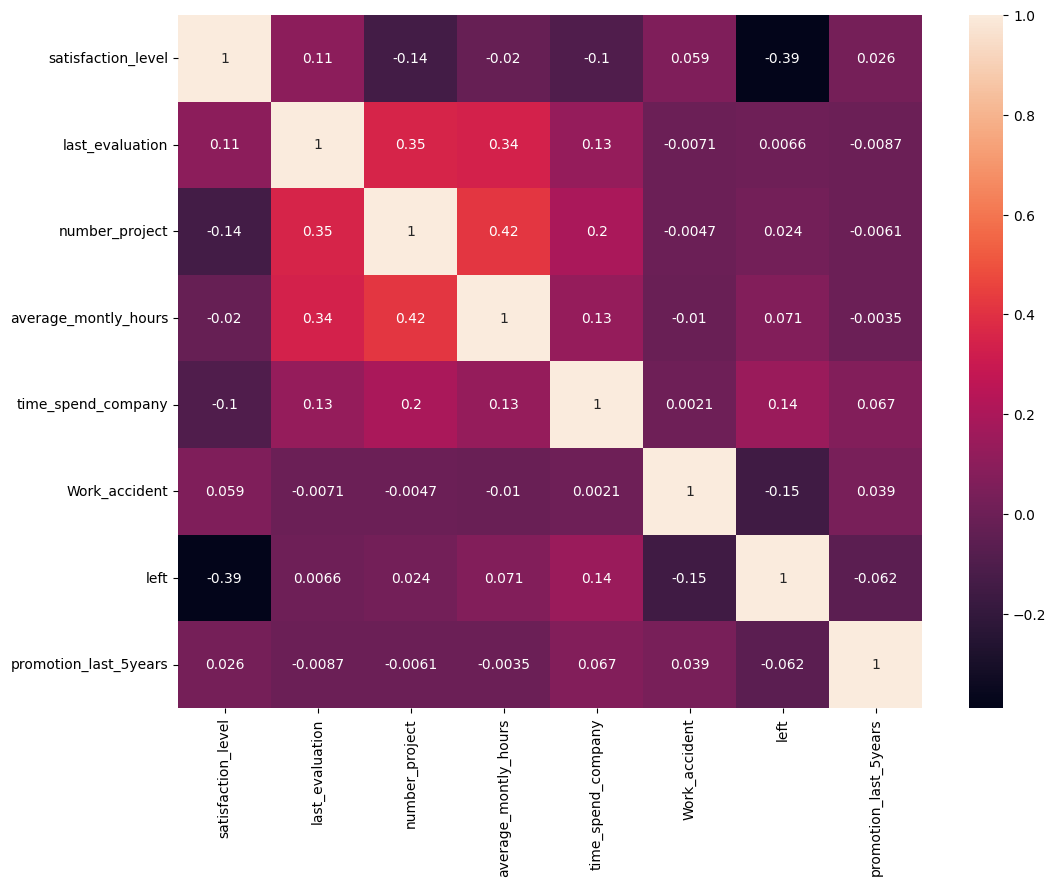

In [16]:
#Find out correlation between all numerical features or columns by viusaliztion
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(Data_to_corr.corr(),annot=True)

'''As heatmap plot Shows that Correlation between the variables either weak positive correaltion or negatively correlated. therefor we have to delve into the other measures to understand the data.'''

(array([1335.,  498.,  477., 1778., 1471., 1775., 1768., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <BarContainer object of 10 artists>)

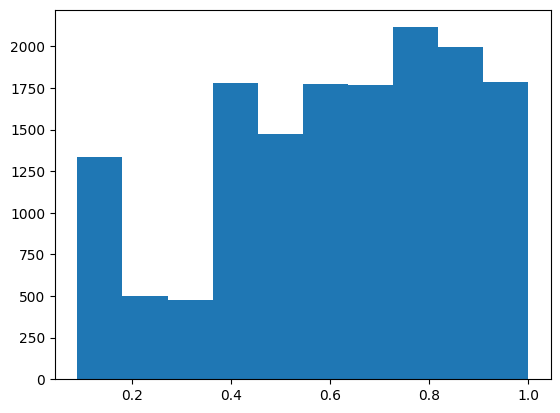

In [17]:
#Distribution plot on employee Satisfaction level
plt.hist(df_1['satisfaction_level'])

'''##Observation:  50% and above, employee's Statisfaction level are 64% and more
 
 ##Modrate satisfied employees are 44% 
 
 ##while employees whose satisfaction level are low is only 9%.'''

(array([ 351.,  885., 2371., 1590., 1372., 1518., 1423., 1970., 1669.,
        1850.]),
 array([0.36 , 0.424, 0.488, 0.552, 0.616, 0.68 , 0.744, 0.808, 0.872,
        0.936, 1.   ]),
 <BarContainer object of 10 artists>)

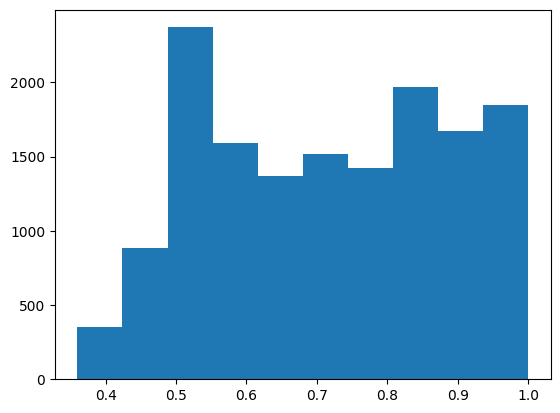

In [18]:
#Distribution plot on Last Evalution conducted by organiztion
plt.hist(df_1['last_evaluation'])

'''##Observation:  50% and above employee's were Evaluated  and their evaluation % are 72 and more
 
 ##Modratly evaluated employees percentage are 56
 
 ##while  low evaluated employees percentage are 36.'''

(array([ 367., 1240., 2733., 1722., 1628., 1712., 1906., 2240., 1127.,
         324.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <BarContainer object of 10 artists>)

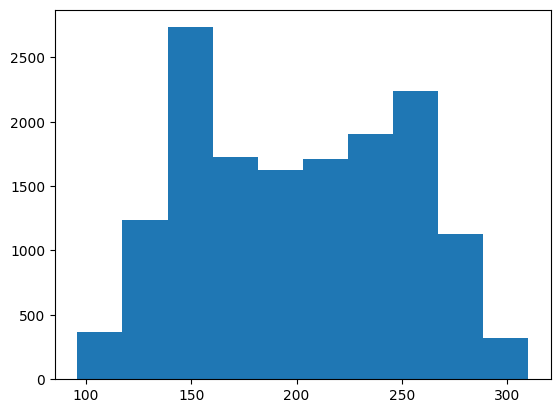

In [19]:
#Distribution plot on Employee monthly Average hours spent on the organiztion 
plt.hist(df_1['average_montly_hours'])

'''##Observation:  50% and above employee's, Monthly Average hours are 200 and above

    ## 25% employees, Monthly Average hours are between 100 to 156
    
    ## Less the 25% employees's, Monthly Average hours  96 and above.'''

<Axes: ylabel='number_project'>

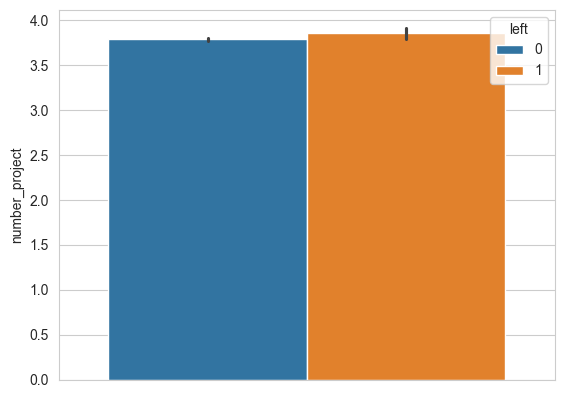

In [20]:
#Bar plot to represent employee project count of both employees who left and stayed in the organization
sns.set_style('whitegrid')

sns.barplot(y= 'number_project',hue= 'left',data= df_1)

'''The plot indicate when there are more number of projects employees leaving and number of projects are less stayed.Therefore,conclusion i can draw that either over streched working hours or  work load or accomplish the given task in the stipuilated timefram or health concerns could be the reason employees leaving the organization '''

Performing clustering on employees who left based on their satisfication and evalution  

In [21]:
#importing kmeans from sklearn
from sklearn.cluster import KMeans

Create object of a k-means model with 3 clusters  
Fit the model on columns satisfaction_level, last_evaluation, and left.

In [22]:
k_means3 = KMeans(n_clusters=3)
df_left= df_1[df_1['left']==1]
df_left=df_left[['satisfaction_level','last_evaluation']]
k_means3.fit(df_left)

KMeans(n_clusters=3)

In [23]:
df_left.shape

(3571, 2)

In [24]:
#Centroid of clusters
print(k_means3.cluster_centers_)

[[0.41014545 0.51698182]
 [0.80851586 0.91170931]
 [0.11115466 0.86930085]]


In [25]:
# Lebels of datapoint and size of lebels
print(k_means3.labels_)
print(len(k_means3.labels_))


[0 1 2 ... 0 2 0]
3571


In [26]:
#Number of Employees are ther in cluster 1,2 and 3
print(type(k_means3.labels_))
unique, counts = np.unique(k_means3.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 1650, 1: 977, 2: 944}


Plot  the Cluster Data

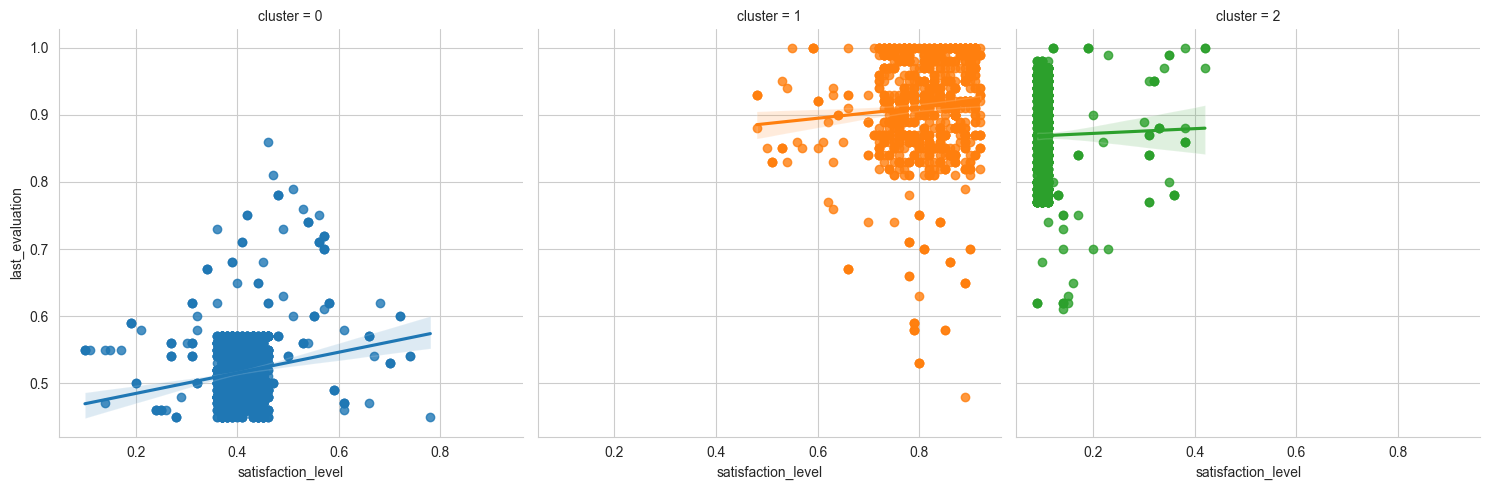

In [27]:
df_left['cluster']= k_means3.labels_
sns.set_style('whitegrid')
sns.lmplot(x='satisfaction_level',y='last_evaluation',data=df_left,hue='cluster',col='cluster')


'''#Cluster 0 Satisfation level is high and evaluation is high--> These set of employees leaving organization HR Dept must focus on and talk to them and address their concerns reason for leaving may be for better opportunities in terms of remuneration and designation.

##Cluster 1 Satisfation level is modrate and evaluation is low

###Cluster 2 Satisfation level is low and evaluation is high--> These set of employees leaving organiztion may be the reason of over stretch of working hours,work pressure, not able to adjust themselves in the current working enviroment,compatibility issue and got better opportunities in terms of remuneration and designation. '''


Handling the left Class Imbalance

In [28]:
df_1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [29]:
# Separating Categorical Variable to Numerical Variable

# df_1=df_1.drop(['sales'],axis=1)
Dict= {}
Dict['Num']=df_1.dtypes[df_1.dtypes == 'float64'].index
Dict['Num_1']= df_1.dtypes[df_1.dtypes == 'int64' ].index
Dict['Cat']=df_1.dtypes[df_1.dtypes == 'object'].index
float_variables=df_1[Dict['Num']]



In [30]:
int_variables=df_1[Dict['Num_1']]


In [31]:
Dict

{'Num': Index(['satisfaction_level', 'last_evaluation'], dtype='object'),
 'Num_1': Index(['number_project', 'average_montly_hours', 'time_spend_company',
        'Work_accident', 'left', 'promotion_last_5years'],
       dtype='object'),
 'Cat': Index(['sales', 'salary'], dtype='object')}

In [32]:
#Applying get_dummies function to Categorical veriable
Cat_veriable={}
Cat_veriable=pd.get_dummies(df_1[Dict['Cat']])


Cat_veriable['salary_high']=Cat_veriable['salary_high'].astype(int)
Cat_veriable['salary_medium']=Cat_veriable['salary_medium'].astype(int)
Cat_veriable['salary_low']=Cat_veriable['salary_low'].astype(int)


print()
print(Cat_veriable.head(2))

[i for i in Cat_veriable.columns if Cat_veriable[i].isnull().sum()>0]


   sales_IT  sales_RandD  sales_accounting  sales_hr  sales_management  \
0     False        False             False     False             False   
1     False        False             False     False             False   

   sales_marketing  sales_product_mng  sales_sales  sales_support  \
0            False              False         True          False   
1            False              False         True          False   

   sales_technical  salary_high  salary_low  salary_medium  
0            False            0           1              0  
1            False            0           0              1  


[]

In [33]:
# Combining Categorical Variable and Numerical veriables
dict_combined={}
dict_combined['satisfaction_level']=float_variables['satisfaction_level']
dict_combined['last_evaluation']=float_variables['last_evaluation']

dict_combined['number_project']=int_variables['number_project']
dict_combined['average_monthly_hours']=int_variables['average_montly_hours']
dict_combined['time_spend_company']=int_variables['time_spend_company']
dict_combined['Work_accident']=int_variables['Work_accident']
dict_combined['left']=int_variables['left']
dict_combined['promotion_last_5years']=int_variables['promotion_last_5years']


dict_combined['salary_high']= Cat_veriable['salary_high']
dict_combined['salary_low']= Cat_veriable['salary_low']
dict_combined['salar_medium']= Cat_veriable['salary_medium']
dict_combined

df_combined=pd.DataFrame(dict_combined)
df_combined.head()



,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salar_medium
0,0.38,0.53,2,157,3,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0


#Spliting Dataset, Applying get_dummies for Categorical veriables and Combine the Dataset

In [34]:
#to know the shape of the combined data categorical and numerical
df_combined.shape

(14999, 11)

In [35]:
# find the Data types of combined data categorical and numerical 
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary_high            14999 non-null  int32  
 9   salary_low             14999 non-null  int32  
 10  salar_medium           14999 non-null  int32  
dtypes: float64(2), int32(3), int64(6)
memory usage: 1.1 MB


In [36]:
# Checking Null values of Concatenated DataFrame Categorical and Numerical
[i for i in df_combined.columns if df_combined[i].isnull().sum()>0]

[]

In [37]:
df_combined.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary_high              0
salary_low               0
salar_medium             0
dtype: int64

<Axes: ylabel='left'>

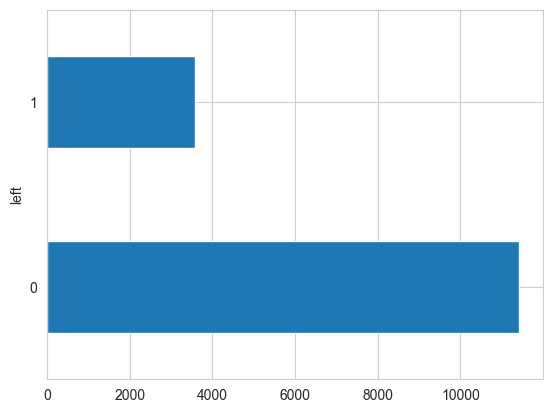

In [38]:
#plot bar graph to show the distribution left employees and employees stayed
df_combined.left.value_counts().plot.barh()

Create a Dataframe for employees who left or stayed and Print the shape of Dataframe

In [39]:
left_df = df_combined[(df_combined.left == 1)]
stayed_df=df_combined[(df_combined.left==0)]

print(f'Employees left  df: {left_df.shape}')
print(f'Employees stayed df: {stayed_df.shape}')

Employees left  df: (3571, 11)
Employees stayed df: (11428, 11)


In [40]:
features_df=df_combined
target_df=df_combined.left

features_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salar_medium
0,0.38,0.53,2,157,3,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0


'''#Prepare Data for Classification

##to perform the operation need to import SMOTE and use upsample to transform the same'''

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
upsample=SMOTE()
transformed_feature_df, transformed_target_df= upsample.fit_resample(features_df,target_df)

In [43]:
print(f'new target count: {transformed_target_df.value_counts()}')
print()


new target count: left
1    11428
0    11428
Name: count, dtype: int64



In [44]:
print(f'old target count: {df_combined.left.value_counts()}')

old target count: left
0    11428
1     3571
Name: count, dtype: int64


Dataset of Left Employees Training Model Using 5-fold Cross-validation

In [45]:
from sklearn.model_selection import KFold

In [46]:
kf=KFold(n_splits=5,shuffle= True)

In [47]:
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [48]:
print("Train & Test")
for i,j in kf.split(transformed_feature_df):
    print("Train\n",i)
    print("Test\n",j)
    print("================================================")    

Train & Test
Train
 [    0     1     2 ... 22851 22852 22853]
Test
 [   17    23    24 ... 22848 22854 22855]
Train
 [    3     4     5 ... 22853 22854 22855]
Test
 [    0     1     2 ... 22843 22847 22850]
Train
 [    0     1     2 ... 22851 22854 22855]
Test
 [    3     5    12 ... 22846 22852 22853]
Train
 [    0     1     2 ... 22853 22854 22855]
Test
 [    4     8    19 ... 22829 22832 22840]
Train
 [    0     1     2 ... 22853 22854 22855]
Test
 [    6     7    11 ... 22838 22849 22851]


In [49]:
#Trained and Tested the data
x_train, x_test, y_train,y_test= train_test_split(transformed_feature_df,transformed_target_df, test_size=0.8, random_state=123)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

 logistice Regrassion model, 5- Fold CV and Models Classification Report

In [51]:
logreg=LogisticRegression(max_iter=5)

In [52]:
print(cross_val_score(logreg,transformed_feature_df, transformed_target_df,scoring='accuracy',cv=5))

[0.5        0.50010939 0.50010939 0.49989061 0.49989061]


C:\Users\Rakesh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rakesh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [53]:
logreg.fit(x_train,y_train)

C:\Users\Rakesh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5)

In [54]:
y_pred=logreg.predict(x_test)

In [55]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [56]:
y_test

1370     1
21489    1
12599    1
20434    1
13031    0
        ..
5368     0
20543    1
6255     0
1943     1
19989    1
Name: left, Length: 18285, dtype: int64

Random Forest Classifier Model, 5-Fold CV and Models Classification Report

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_classifier=RandomForestClassifier(n_estimators=100)

In [59]:
print(cross_val_score(rf_classifier,transformed_feature_df, transformed_target_df,scoring='accuracy',cv=5))

[1. 1. 1. 1. 1.]


In [60]:
rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_pred1=rf_classifier.predict(x_test)

In [62]:
y_pred1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [63]:
y_test

1370     1
21489    1
12599    1
20434    1
13031    0
        ..
5368     0
20543    1
6255     0
1943     1
19989    1
Name: left, Length: 18285, dtype: int64

Gradient Boosting Classifier Model, 5-Fold CV and Models Classification Report

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gb_classifier= GradientBoostingClassifier(n_estimators=100)

In [66]:
print(cross_val_score(gb_classifier,transformed_feature_df,transformed_target_df,scoring='accuracy',cv=5))

[1. 1. 1. 1. 1.]


In [67]:
gb_classifier.fit(x_train,y_train)

GradientBoostingClassifier()

In [68]:
y_pred2=gb_classifier.predict(x_test)

In [69]:
y_pred2

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [70]:
y_test

1370     1
21489    1
12599    1
20434    1
13031    0
        ..
5368     0
20543    1
6255     0
1943     1
19989    1
Name: left, Length: 18285, dtype: int64

Using ROC/AUC Method to Find Best Model

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

In [72]:
pred = logreg.predict_proba(x_test)
pred1 = rf_classifier.predict_proba(x_test)
pred2= gb_classifier.predict_proba(x_test)


In [73]:
# roc curve for models
fpr, tpr, thrash= roc_curve(y_test,pred[:,1], pos_label=1)
fpr1, tpr1, thrash1= roc_curve(y_test,pred1[:,1], pos_label=1)
fpr2, tpr2, thrash2= roc_curve(y_test,pred2[:,1], pos_label=1)

#roc curve for tpr=fpr
random_value=[ 0 for i in range(len(y_test))]
p_fpr, p_tpr,_= roc_curve(y_test,random_value,pos_label=1)

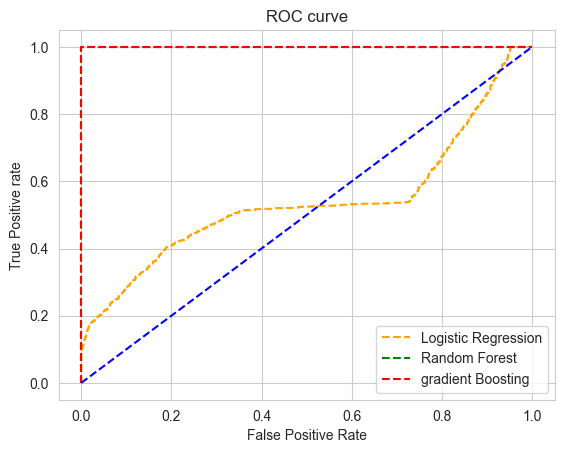

In [74]:
import matplotlib.pyplot as plt

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='gradient Boosting')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();



In [75]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred1[:,1])
auc_score2 = roc_auc_score(y_test, pred2[:,1])

print(auc_score1, auc_score2)

1.0 1.0


''' Two out of three the models i.e Random forest and Gradient Boosting are doing good.ROC Curve and Area under Curve(AUC) is equal to  1'''

Confusion Matrix for Trained and tested the models

In [88]:
# Confusion matris  & Classification Report for logistic regression model
print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy Score: 0.49893355209187856
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9162
           1       0.50      1.00      0.67      9123

    accuracy                           0.50     18285
   macro avg       0.25      0.50      0.33     18285
weighted avg       0.25      0.50      0.33     18285



C:\Users\Rakesh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rakesh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rakesh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [77]:
#classification Report for Random Forest Classifier model
print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred1))
print()
print(metrics.classification_report(y_test,y_pred1))

Accuracy Score: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9162
           1       1.00      1.00      1.00      9123

    accuracy                           1.00     18285
   macro avg       1.00      1.00      1.00     18285
weighted avg       1.00      1.00      1.00     18285



In [84]:
# Confusion matrix and classification Report for Gradient Booting Classifier model
print("Accuracy Score: ",metrics.accuracy_score(y_test,y_pred2))
print(metrics.classification_report(y_test,y_pred2))

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9162
           1       1.00      1.00      1.00      9123

    accuracy                           1.00     18285
   macro avg       1.00      1.00      1.00     18285
weighted avg       1.00      1.00      1.00     18285



Metric matter most for Decision making from the Confusion Matrix

""" There Two Secnario  we must consider : 1) False Negative --> Model predicted employees are going to leave but actually stayed with orgnization.
Secnario 1 Surely it will cost to the organiztion financially or otherrwise but it's one time.

#2)False Positive -->Model predicted employees's are going to stay but employees's left.
 Secnario 2 should be taken into cosideration becasue it will matter most to the organiztion it will have long term financial impact, cost of replacement,lost skills, cost to acquire those skills, to clients and institioual knowledge and damage to morale if employee well liked in the office. 

Precision metric to be used from the  confusion matrix

 Precision=True positive/True positive + False positive
 9123/9123+0= 1'''   

7. Retention Strategies for targeted Employees

In [79]:
# Predict_proba() return Probabilities of classification labels of employees trunover 
pred = logreg.predict_proba(x_test)
pred1 = rf_classifier.predict_proba(x_test)
pred2= gb_classifier.predict_proba(x_test)

In [80]:
print("pred",pred1)   ,    y_pred1

pred [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


(None, array([1, 1, 1, ..., 0, 1, 1], dtype=int64))

In [81]:
pred1[:30] ,         y_pred1[:30]

(array([[0.  , 1.  ],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [0.04, 0.96],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [0.04, 0.96],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.98, 0.02],
        [0.03, 0.97],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [0.99, 0.01],
        [1.  , 0.  ],
        [1.  , 0.  ]]),
 array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 0], dtype=int64))

In [82]:
x_test[:30]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salar_medium
1370,0.740000,0.990000,5,263,5,0,1,0,0,1,0
21489,0.410000,0.460000,2,160,3,0,1,1,0,1,0
12599,0.110000,0.920000,7,307,4,0,1,0,0,1,0
20434,0.849211,0.944480,5,236,5,0,1,0,0,1,0
13031,0.480000,0.580000,3,194,3,0,0,0,0,0,1
11378,0.680000,0.530000,3,138,2,1,0,0,0,1,0
14478,0.450000,0.530000,2,129,3,0,1,0,1,0,0
14780,0.250000,0.460000,4,214,4,0,1,0,0,0,1
15640,0.800836,0.909164,4,225,5,0,1,0,0,0,1
21318,0.380000,0.550000,2,148,3,0,1,0,0,1,0


In [83]:
green=0
yellow=0
orange=0
red=0
for i in y_pred1[:10]:
            for row in pred1[0:10]:
                   for col in range(len(row)):
                      if col==i:
                        if row[col]*100 <0.2*100:
                               green=green+i
                        elif row[col]*100 <0.2*100 and row[col]*100< 0.6*100:
                              yellow=yellow+i
                        elif row[col]*100 <0.6*100 and row[col]*100 < 0.9*100:
                              orange= orange+i
                        elif row[col]*100> 0.9*100:
                              red=red+i                  
                            
print(f'Employees Belong to Safe Zone(Green)Probalities of leaving less or negligible :{green}')                          
print(f'Employees Belong to Low Risk Zone(Yellow)Probalities of leaving organiztion comparatively higher: {yellow }')                          
print(f'Employees Belong to Medium Risk(Orange)Probalities of leaving organiztion modrate: { orange}')                          
print(f'Employees Belong to High Risk Zone(Red)Probalities of leaving organiztion high: {red}')        
                                               

Employees Belong to Safe Zone(Green)Probalities of leaving less or negligible :16
Employees Belong to Low Risk Zone(Yellow)Probalities of leaving organiztion comparatively higher: 0
Employees Belong to Medium Risk(Orange)Probalities of leaving organiztion modrate: 0
Employees Belong to High Risk Zone(Red)Probalities of leaving organiztion high: 64


'''Employees  are there in the Green zone probabilites of leaving the ogranization are almost neglible.What the pattern model shows that their satisfication level,last evalotion and salary almsot the parameterupto the mark.
on the contrary,Employees whosoever are their in High risk zone(red Zone) probabilities are high to leave the organiztion because diferent set of employees have different reason to quit like some of them have satisfaciton level are low,some of the not haapy with last evalution etc and some of them have salary concerns.
HR Dept have to each and every Employees concerns into cognizance and talk to them one by one to address the concerns.
1) salary concerns may dealt with increasing salary by evaluting his/her performence  or must incentivesed on performence.

#2) HR should talk to employees reason of low statisfoctry level and address graciously.    

#3) HR should run program to improve efficency,motivational program and upskilling.'''
